## This is the Notebook to compare fmg & gather & mapping results

- gather_ref_f_weighted → standard gather result (k31, used to select genomes)
- ref_f_weighted → FMG (fastmulti-gather) result (k21)
- f_mapped_reads → genome-grist read mapping result

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# 1) read files
gather = pd.read_csv("../gather/gather_ref_f_weighted.tsv", sep="\t")
mapped  = pd.read_csv("../f_mapped_reads/f_mapped_reads.csv")
fmg  = pd.read_csv("../fmg/fmg_r226_k31_biome.csv")

# rename column to match others
mapped = mapped.rename(columns={"sample_id": "accession"})
fmg  = fmg.rename(columns={"ref_f_weighted":"fmg_ref_f_weighted"})

# 2) merge on accession
merged = (
    gather
    .merge(mapped, on="accession", how="inner")
    .merge(fmg, on="accession", how="inner")
)

# 3) keep only requested columns (in your preferred order)
keep = [
    "accession",
    "gather_ref_f_weighted",
    "fmg_ref_f_weighted",
    "f_mapped_reads",
    "biome3",
    "total_mapped_reads",
    "total_n_reads",
    "n_matches",
]
merged = merged[keep]

# 4) display + save
merged.head()

,accession,gather_ref_f_weighted,fmg_ref_f_weighted,f_mapped_reads,biome3,total_mapped_reads,total_n_reads,n_matches
0,DRR014782,0.868853,0.911885,0.905193,Host-associated:Mammals:Respiratory system,75612507,83531900,3721
1,DRR014785,0.863483,0.911224,0.904628,Host-associated:Mammals:Respiratory system,83163638,91931356,4159
2,DRR121397,0.153467,0.238478,0.371231,Host-associated:Plants:Root,2121643,5715162,3533
3,DRR121401,0.107862,0.183724,0.288395,Host-associated:Plants:Root,1311236,4546672,3031
4,ERR10695318,0.748644,0.797516,0.859269,Engineered:Food production:Dairy products,123175020,143348680,535


In [11]:
merged.to_csv("../results/gather_fmg_grist_k31.csv",index=False)

In [12]:
df = pd.read_csv("../results/gather_fmg_grist_k31.csv")
df

,accession,gather_ref_f_weighted,fmg_ref_f_weighted,f_mapped_reads,biome3,total_mapped_reads,total_n_reads,n_matches
0,DRR014782,0.868853,0.911885,0.905193,Host-associated:Mammals:Respiratory system,75612507,83531900,3721
1,DRR014785,0.863483,0.911224,0.904628,Host-associated:Mammals:Respiratory system,83163638,91931356,4159
2,DRR121397,0.153467,0.238478,0.371231,Host-associated:Plants:Root,2121643,5715162,3533
3,DRR121401,0.107862,0.183724,0.288395,Host-associated:Plants:Root,1311236,4546672,3031
4,ERR10695318,0.748644,0.797516,0.859269,Engineered:Food production:Dairy products,123175020,143348680,535
...,...,...,...,...,...,...,...,...
77,SRR6765262,0.405779,0.528815,0.762911,Host-associated:Birds:Digestive system,1518088,1989862,2021
78,SRR7299214,0.289706,0.350863,0.403080,Engineered:Solid waste:Landfill,6705137,16634768,3762
79,SRR7610133,0.289630,0.296219,0.510271,Host-associated:Fish:Digestive system,3058996,5994846,509
80,SRR9109404,0.612335,0.628079,0.646912,Host-associated:Fish:Digestive system,25075735,38762198,1110


In [13]:
# sanity check
df.shape, df["accession"].nunique()

((82, 8), 82)

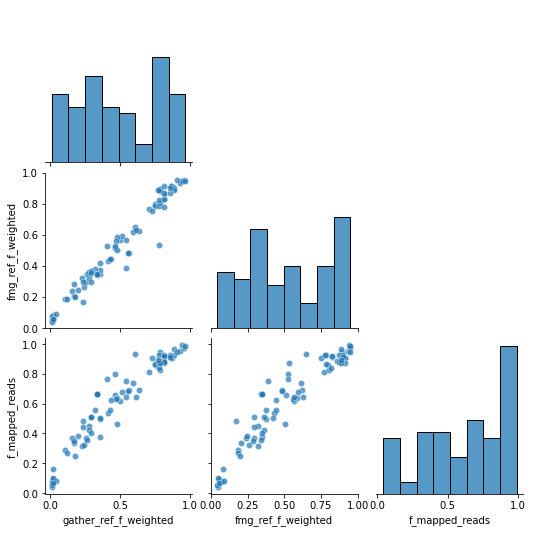

In [14]:
g = sns.pairplot(
    df,
    vars=["gather_ref_f_weighted", "fmg_ref_f_weighted", "f_mapped_reads"],
    corner=True,
    plot_kws={"alpha": 0.7, "s": 40}
)

# set axis limits for ref_f_weighted
for i, yvar in enumerate(g.y_vars):
    for j, xvar in enumerate(g.x_vars):
        ax = g.axes[i, j]
        if ax is None:
            continue
        if xvar == "fmg_ref_f_weighted":
            ax.set_xlim(0, 1.0)
        if yvar == "fmg_ref_f_weighted":
            ax.set_ylim(0, 1.0)

plt.show()